In [164]:
import  calendar as cal, datetime as dt, numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import  matplotlib.colors
from scipy import stats, integrate

In [218]:
import statistics

In [72]:
sns.set(color_codes=True)

In [161]:
%matplotlib inline

In [163]:
np.random.seed(1)

In [170]:
data = pd.read_csv("DATA/dataset_pret_pour_analyse_exploratoire.csv",sep =';',header = 0 , parse_dates=[0,1,9,10])

> ### Inventaire des données

In [83]:
data.shape

(165969, 29)

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165969 entries, 0 to 165968
Data columns (total 29 columns):
dateHeureRec            165969 non-null datetime64[ns]
dateHeureGPS            165969 non-null datetime64[ns]
idBalise                165969 non-null int64
vitesse                 165969 non-null int64
direction               165969 non-null int64
altitude                165969 non-null int64
satellites              165969 non-null int64
messageId               165969 non-null int64
distance                165969 non-null int64
dateHeureServeurPrec    165969 non-null datetime64[ns]
dateHeureBalisePrec     165969 non-null datetime64[ns]
distancePrec            165969 non-null int64
delaiServeur            165969 non-null int64
delaiBalise             165969 non-null int64
deltaDistance           165969 non-null int64
lng                     165969 non-null float64
lat                     165969 non-null float64
power                   165969 non-null float64
volt               

> ### Valeurs aberrantes

In [85]:
data[data['delaiTransmission']<0].shape

(30, 29)

Un délai de transmission négatif signifie que les horloges du serveur et des balises ne sont pas réglés de la même manière. Le délai ne peut être calculé de manière correcte sur cette base.

In [86]:
data[data['delaiServeur']<0].shape

(82, 29)

Un délai de réception sur le serveur entre deux enregistrement qui est négatif signifie que le serveur n'a pas enregistré les positions des balises dans l'ordre chronologique d'enregistrement des positions par la balise GPS.

In [87]:
data[data['delaiBalise']<0].shape

(0, 29)

Aucun délai négatif puisque le tri des observations a été établi selon l'ordre d'enregistrement des positons GPS

> ### Analyse univariée

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f598dd59ac8>]], dtype=object)

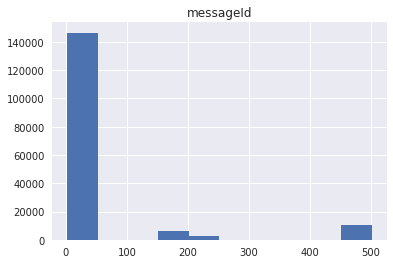

In [239]:
data.hist(column='messageId')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f598c84db70>]], dtype=object)

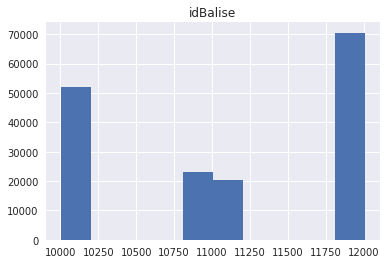

In [240]:
data.hist(column='idBalise')

- Délai d'émission de la balise

In [90]:
data.delaiBalise.describe()

count    165969.000000
mean        346.189397
std        5690.746712
min           0.000000
25%          20.000000
50%          20.000000
75%          26.000000
max      438085.000000
Name: delaiBalise, dtype: float64

Un délai de transmission trés élevé (438085 secondes soit xx jours pour l'enregistrement sur le serveur) est représentatif d'un incident survenu sur le serveur d'application. Position reçue le xxx  à xxx et relevé lexxx  à xxx

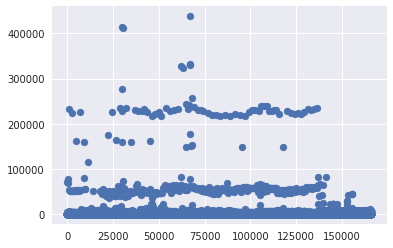

In [263]:
df_plot=data.delaiBalise
#df_plot.values
#graph = sns.lmplot(df_plot.index, df_plot.values, hue = "client", data = df_plot, fit_reg = False)
plt.scatter(df_plot.index,df_plot.values)
plt.show()

In [390]:
data[data["delaiBalise"]>300000].delaiTransmission

29742       2
30374       2
62338       2
63416       3
66834       2
66871    7248
67257       3
Name: delaiTransmission, dtype: int64

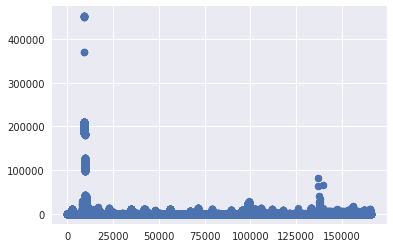

In [337]:
df_plot=data.delaiTransmission
#df_plot.values
#graph = sns.lmplot(df_plot.index, df_plot.values, hue = "client", data = df_plot, fit_reg = False)
plt.scatter(df_plot.index,df_plot.values)
plt.show()

In [339]:
data[data["delaiTransmission"]>300000]

,dateHeureRec,dateHeureGPS,idBalise,vitesse,direction,altitude,satellites,messageId,distance,dateHeureServeurPrec,...,labelBalise,labelMessage,delaiTransmission,jourBalise,jourServeur,rangDateGPS,rangDateRec,momentGPS,client,labelClient
9085,2018-01-10 17:21:54,2018-01-05 11:45:07,10004,98,132,14,7,2,61625953,2018-01-05 12:21:37,...,B10004,B2,452207,5,3,474307,926514,2018-01-05 11:00:00,10,C10
9086,2018-01-10 17:21:59,2018-01-05 11:45:27,10004,94,246,16,8,2,61626488,2018-01-10 17:21:54,...,B10004,B2,452192,5,3,474327,926519,2018-01-05 11:00:00,10,C10
9087,2018-01-10 17:22:10,2018-01-05 11:45:47,10004,96,252,25,8,2,61627003,2018-01-10 17:21:59,...,B10004,B2,452183,5,3,474347,926530,2018-01-05 11:00:00,10,C10
9088,2018-01-10 17:22:20,2018-01-05 11:46:07,10004,109,248,30,8,2,61627582,2018-01-10 17:22:10,...,B10004,B2,452173,5,3,474367,926540,2018-01-05 11:00:00,10,C10
9089,2018-01-10 17:22:24,2018-01-05 11:46:27,10004,108,255,26,8,2,61628194,2018-01-10 17:22:20,...,B10004,B2,452157,5,3,474387,926544,2018-01-05 11:00:00,10,C10
9090,2018-01-10 17:22:28,2018-01-05 11:46:47,10004,106,249,20,8,2,61628798,2018-01-10 17:22:24,...,B10004,B2,452141,5,3,474407,926548,2018-01-05 11:00:00,10,C10
9091,2018-01-10 17:22:31,2018-01-05 11:47:07,10004,99,255,17,8,2,61629372,2018-01-10 17:22:28,...,B10004,B2,452124,5,3,474427,926551,2018-01-05 11:00:00,10,C10
9092,2018-01-10 17:22:35,2018-01-05 11:47:27,10004,95,277,19,8,2,61629911,2018-01-10 17:22:31,...,B10004,B2,452108,5,3,474447,926555,2018-01-05 11:00:00,10,C10
9093,2018-01-10 17:22:40,2018-01-05 11:47:47,10004,87,250,16,8,2,61630445,2018-01-10 17:22:35,...,B10004,B2,452093,5,3,474467,926560,2018-01-05 11:00:00,10,C10
9094,2018-01-10 17:22:43,2018-01-05 11:48:07,10004,32,279,13,8,2,61630749,2018-01-10 17:22:40,...,B10004,B2,452076,5,3,474487,926563,2018-01-05 11:00:00,10,C10


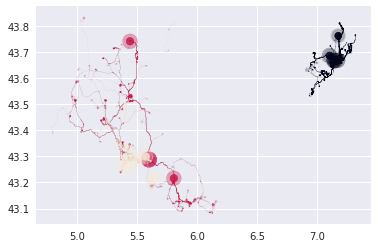

In [367]:
x = df["lng"]
y = df["lat"]
colors = df["client"]
area = df["delaiBalise"]/1000
with plt.style.context('fast'):
 plt.scatter(x, y, s=area, c=colors, alpha=0.1)
plt.show()

In [340]:
df=data[data["delaiBalise"]<300000]

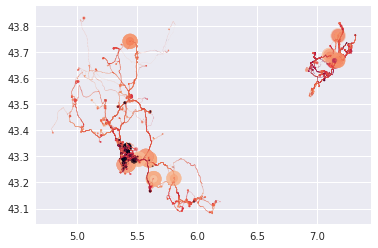

In [341]:
x = df["lng"]
y = df["lat"]
colors = df["satellites"]
area = df["delaiBalise"]/1000

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

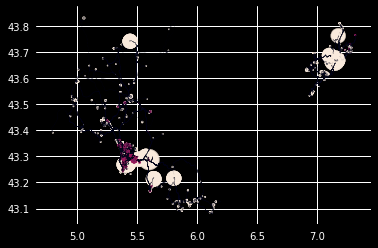

In [392]:
x = df["lng"]
y = df["lat"]
colors = df["messageId"]
area = df["delaiBalise"]/1000
with plt.style.context(('dark_background')):
 plt.scatter(x, y, s=area, c=colors, alpha=0.9)
plt.show()

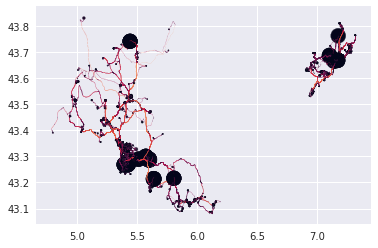

In [371]:
x = df["lng"]
y = df["lat"]
colors = df["vitesse"]
area = df["delaiBalise"]/1000
with plt.style.context(('seaborn-bright')):
 plt.scatter(x, y, s=area, c=colors, alpha=0.9)
plt.show()

/home/user/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


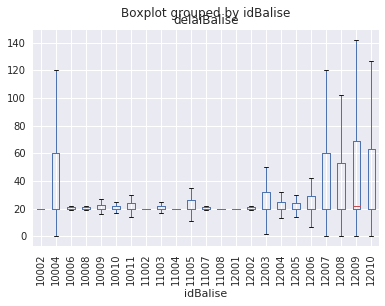

In [345]:
data.boxplot(column='delaiBalise',by='idBalise', showfliers=False)
plt.xticks(rotation=90)
plt.show()

In [140]:
data.delaiServeur.describe()

count    165969.000000
mean        346.202688
std        5798.977300
min        -286.000000
25%          20.000000
50%          20.000000
75%          25.000000
max      450017.000000
Name: delaiServeur, dtype: float64

In [34]:
df.DeltaDist.describe()

AttributeError: 'DataFrame' object has no attribute 'DeltaDist'

In [64]:
df=data
df_delai_x=df[df['DelaiGPSPrec']>30]

ratio=100*df_delai_x.idBalise.count()/df.idBalise.count()
print ('Pourcentage hors délai (+ de 20 secondes) pour emettre une nouvelle position : ',  ratio)

Pourcentage hors délai (+ de 20 secondes) pour emettre une nouvelle position :  22.0059167676


/home/user/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


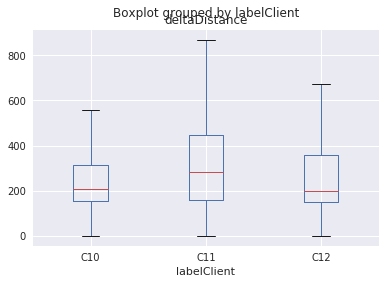

In [394]:
df=data
df.boxplot(column='deltaDistance' ,by='labelClient', showfliers=False)
#plt.xticks(rotation=90)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f598c2542b0>]], dtype=object)

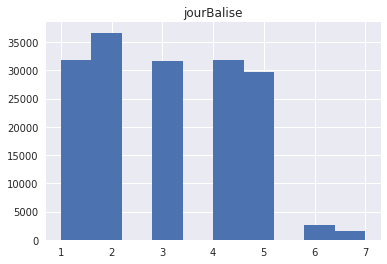

In [236]:
df=data
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(column='jourBalise')

> ### Analyse bi-variée

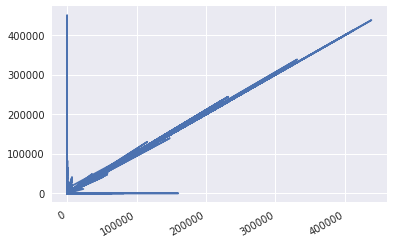

In [138]:
# create data 
#y est au format numérique
yt = data["delaiServeur"]
#x est au format datetime
xt = data["delaiBalise"]
 
# plot
plt.plot(xt,yt)
plt.gcf().autofmt_xdate()
plt.show()

In [194]:
data_test4=data[['lng', 'lat','delaiBalise']]
data_test4.describe()

,lng,lat,delaiBalise
count,165969.000000,165969.000000,165969.000000
mean,5.981367,43.441618,346.189397
std,0.793179,0.184166,5690.746712
min,4.788180,43.079900,0.000000
25%,5.399860,43.287790,20.000000
50%,5.487980,43.356090,20.000000
75%,7.061340,43.656750,26.000000
max,7.319920,43.831350,438085.000000


y               (43.078, 43.174]  (43.174, 43.268]  (43.268, 43.362]  \
x                                                                      
(4.785, 5.041]          0.000000          0.000000          0.000000   
(5.041, 5.295]          0.000000          0.000000        485.956274   
(5.295, 5.548]          0.000000       8793.286570       3695.480291   
(5.548, 5.801]        827.791912       8194.906088      14678.483761   
(5.801, 6.054]        459.054266      11017.536419          2.923264   
(6.054, 6.307]        754.102948          0.000000          0.000000   
(6.814, 7.067]          0.000000          0.000000          0.000000   
(7.067, 7.32]           0.000000          0.000000          0.000000   

y               (43.362, 43.456]  (43.456, 43.55]  (43.55, 43.643]  \
x                                                                    
(4.785, 5.041]        369.574331       661.459041       581.298008   
(5.041, 5.295]        370.293756       454.767486       160.820668   

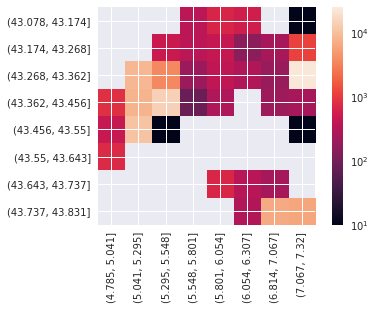

In [212]:
import numpy as np; np.random.seed(1)
import pandas as pd
import matplotlib.pyplot as plt
import  matplotlib.colors

#xpos = np.random.randint(0,10, size=50)
#ypos = np.random.randint(0,10, size=50)
#mass = np.random.randint(0,75, size=50)
xpos = data_test4['lng']
ypos = data_test4['lat']
mass = data_test4['delaiBalise']

df = pd.DataFrame({"x":xpos, "y":ypos, "mass":mass})

#xbins = range(100)
#ybins = range(100)
su = df.mass.groupby([pd.cut(df.x, bins=10, include_lowest=True), 
                     pd.cut(df.y, bins=8, include_lowest=True)]) \
            .std().unstack(fill_value=0)
print (su)
im = plt.imshow(su.values, norm=matplotlib.colors.LogNorm(10,25000))
plt.xticks(range(len(su.index)), su.index, rotation=90)
plt.yticks(range(len(su.columns)), su.columns)
plt.colorbar(im)
plt.show()

In [ ]:
import numpy as np; np.random.seed(1)
import pandas as pd
import matplotlib.pyplot as plt
import  matplotlib.colors

#xpos = np.random.randint(0,10, size=50)
#ypos = np.random.randint(0,10, size=50)
#mass = np.random.randint(0,75, size=50)
xpos = data_test2['Lng']
ypos = data_test2['Lat']
mass = data_test2['DelaiGPSPrec']

df = pd.DataFrame({"x":xpos, "y":ypos, "mass":mass})

#xbins = range(100)
#ybins = range(100)
su = df.mass.groupby([pd.cut(df.x, bins=10, include_lowest=True), 
                     pd.cut(df.y, bins=10, include_lowest=True)]) \
            .std().unstack(fill_value=0)
print (su)
im = plt.imshow(su.values, norm=matplotlib.colors.LogNorm(1,100000))
plt.xticks(range(len(su.index)), su.index, rotation=90)
plt.yticks(range(len(su.columns)), su.columns)
plt.colorbar(im)
plt.show()


In [213]:
df10=data[data['labelBalise'].isin(['B10002', 'B10004', 'B10006', 'B10008', 'B10009', 'B10010', 'B10011'])]
df11=data[data['labelBalise'].isin(['B11002', 'B11003', 'B11004', 'B11005', 'B11007', 'B11008'])]
df12=data[data['labelBalise'].isin(['B12001', 'B12002', 'B12003', 'B12004', 'B12005', 'B12006', 'B12007', 'B12008', 'B12009', 'B12010'])]

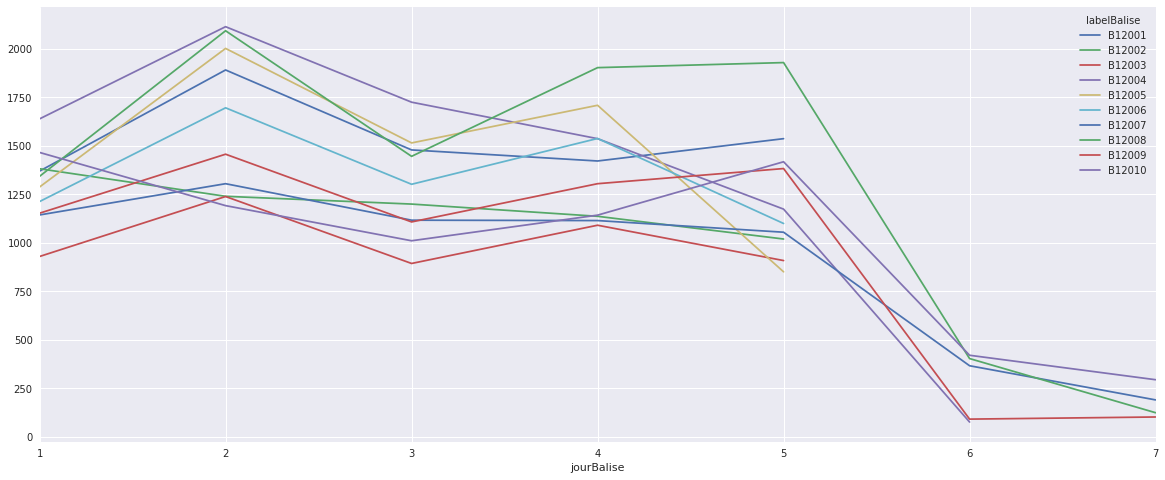

In [234]:
# plot data
fig, ax = plt.subplots(figsize=(20,8))
# use unstack()
df12.groupby(['jourBalise','labelBalise']).count()['delaiBalise'].unstack().plot(ax=ax)

#df.groupby(['DayWeekGPS','BaliseLabel']).count()

In [62]:

pd.cut(xpos, bins=4, include_lowest=True)

0         (6.688, 7.319]
5         (6.688, 7.319]
54        (6.688, 7.319]
55        (6.688, 7.319]
57        (6.688, 7.319]
69        (6.688, 7.319]
70        (6.688, 7.319]
71        (6.688, 7.319]
72        (6.688, 7.319]
73        (6.688, 7.319]
75        (6.688, 7.319]
76        (6.688, 7.319]
77        (6.688, 7.319]
78        (6.688, 7.319]
80        (6.688, 7.319]
81        (6.688, 7.319]
82        (6.688, 7.319]
83        (6.688, 7.319]
85        (6.688, 7.319]
86        (6.688, 7.319]
89        (6.688, 7.319]
98        (6.688, 7.319]
116       (6.688, 7.319]
123       (6.688, 7.319]
124       (6.688, 7.319]
125       (6.688, 7.319]
126       (6.688, 7.319]
127       (6.688, 7.319]
134       (6.688, 7.319]
171       (6.688, 7.319]
               ...      
165910    (5.428, 6.058]
165915    (5.428, 6.058]
165917    (5.428, 6.058]
165918    (5.428, 6.058]
165919    (5.428, 6.058]
165920    (5.428, 6.058]
165922    (5.428, 6.058]
165924    (5.428, 6.058]
165925    (5.428, 6.058]


In [65]:
df=data
df_delai_neg_serveur=df[df['DelaiReceptionPrec']<0]

ratio=100*df_delai_neg_serveur.idBalise.count()/df.idBalise.count()
print ('Pourcentage délai négatif pour receptioner une nouvelle position : ',  ratio)

Pourcentage délai négatif pour receptioner une nouvelle position :  0.0494068169357


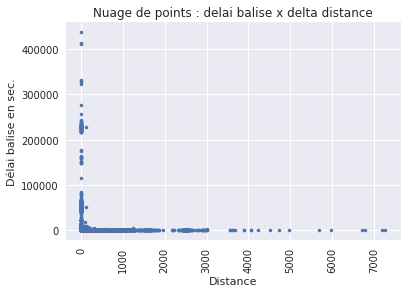

In [146]:
df=data
x = df['deltaDistance']
y = df['delaiBalise']

plt.scatter(x,y,s=10)

plt.title('Nuage de points : delai balise x delta distance')
plt.xlabel('Distance')
plt.ylabel('Délai balise en sec.')
plt.savefig('Nuage delai emission x distance.png')

plt.xticks(rotation=90)
plt.show()

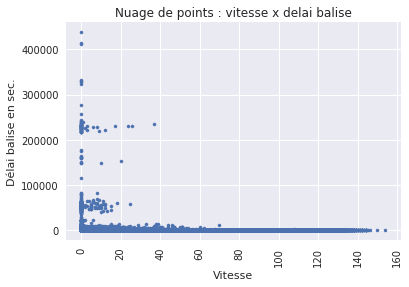

In [376]:
df=data
x = df['vitesse']
y = df['delaiBalise']

plt.scatter(x,y,s=10)

plt.title('Nuage de points : vitesse x delai balise')
plt.xlabel('Vitesse')
plt.ylabel('Délai balise en sec.')
plt.savefig('Nuage : vitesse x delaiBalise.png')

plt.xticks(rotation=90)
plt.show()

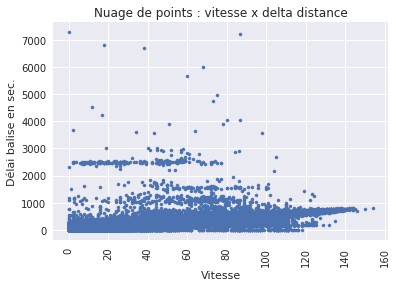

In [375]:
df=data
x = df['vitesse']
y = df['deltaDistance']

plt.scatter(x,y,s=10)

plt.title('Nuage de points : vitesse x delta distance')
plt.xlabel('Vitesse')
plt.ylabel('Délai balise en sec.')
plt.savefig('Nuage : vitesse x distance.png')

plt.xticks(rotation=90)
plt.show()